# Lecture 5-6

## Outline:
**1. Approximate the mean of $e^x$, where $x \sim N(\theta,1)$ in Python and check how it converges to E($e^x$) according to Law of Large Numbers.**

**2. Define a function to simulate a MA(q) model and calculate the autocovariance function in Python.**

## 1. Law of Large Numbers

* 1) Set-up the parameters
  * Drawing random numbers: In fact, all the random numbers drawn from a computer are **pseudo** random numbers.To generate a sequence of "random" number, the machine starts with setting up an initial number(called "the seed", also), multiplying it by a large numbe ,then taking modulo of that product. The resulting number is then used as the seed to generate the next "random" number. As a result, so long as the machine starts with the same seed, it can repeat the "random" sequence. This algorithm that generating a sequence of numbers whose properties approximate the properties of sequences of random numbers is called Pseudorandom number generator.  
  
    * np.random.get_state(): This is the function to store the internal state of the generator, of which the first drawing process following by this command.
    * np.random.set_state(st): Suppose we have stored the value of np.random.get_state() in the variable "st". This statement "np.random.set_state(st)", will assign this generator to the drawing process followed by it. Thus, we can get exactly the same sequence of "random" numbers.  
    
  * To calculate $e^x$, we can also use:  
  import math  
  y = exp(x)  
  But here, x can only take the form of a scalar

In [7]:
#%% 1) Set-up the parameters
import numpy as np

I      = 1000;                              # Number of draws used for the approximation
theta  = 0;                                 # Change if desired

st     = np.random.get_state()              # Store the random number generator(internal state of the generator).
x      = np.random.normal(theta, 1, [I,1])  # Draw I normals
np.random.set_state(st)                     # Reusing the generator for the next random draw to get the same sequence
y      = np.exp(x)

approx = np.mean(y);                        #Approximation

In [36]:
# Reproduce "random numbers"
import numpy as np
import pandas as pd

state = np.random.get_state()               
x1    = np.random.normal(2, 1, [6,1])  
np.random.set_state(state)  
x2    = np.random.normal(2, 1, [8,1]) 

a     = pd.DataFrame(x1,columns={"x1"})
b     = pd.DataFrame(x2,columns={"x2"})
print(a)
print(b)

         x1
0  1.699354
1 -0.410910
2  1.905357
3  3.317991
4  2.672233
5  2.825450
         x2
0  1.699354
1 -0.410910
2  1.905357
3  3.317991
4  2.672233
5  2.825450


In [3]:
state = np.random.get_state()              
x1    = np.random.normal(2, 1, [6,1]) 
st    = np.random.get_state() 
x3    = np.random.normal(2, 1, [6,1])
np.random.set_state(state)  
x2    = np.random.normal(2, 1, [8,1]) 

a     = pd.DataFrame(x1,columns={"x1"})
b     = pd.DataFrame(x2,columns={"x2"})
c     = pd.DataFrame(x3,columns={"x3"})
print(a)
print(b)
print(c)

         x1
0  3.167134
1  2.014396
2  2.456969
3  0.456391
4  1.988360
5  2.130139
         x2
0  3.167134
1  2.014396
2  2.456969
3  0.456391
4  1.988360
5  2.130139
6  2.362845
7  2.025820
         x3
0  2.362845
1  2.025820
2  2.124081
3  3.118202
4  2.821254
5  1.459734


* 2) Display the approximation

In [8]:
#%% 2) Display the approximation

print("The approximation of E[exp(X)] where X is Normal with mean", theta, "and variance 1 using", I, "draws is", approx, ".")


The approximation of E[exp(X)] where X is Normal with mean 0 and variance 1 using 1000 draws is 1.6202367665597401 .


* 3) Approximate the variance

In [14]:
#%% 3) Approximate the variance

sigma2  = np.var(y);

* 4) Comparing estimated value with true expectation

In [13]:
#%%4) LLN

from scipy.stats import norm

alpha = .05;
c     = norm.ppf(1-(alpha/2))  # Standard Normal inverse cumulative distribution function (percent point function)
CI    = [ approx - ((sigma2**.5)*c/(I**.5)) , approx + ((sigma2**.5)*c/(I**.5))  ]

print("Thus with", (1-alpha)*100, "% probability the true mean is between", CI)

Thus with 95.0 % probability the true mean is between [1.4967599187366072, 1.743713614382873]


## Define a function in Python

The MA(q) model is specified as follows:  
  
  $X_t =\theta_{0}\epsilon_t + \theta_{1} \epsilon_{t-1} + \theta_{2} \epsilon_{t-2} + ... + \theta_{q} \epsilon_{t-q}$, where $\epsilon_t \sim N(0,\sigma^2)$ i.i.d

* In python, a function is defined by calling "def". As shown below, GaussianMAq is the name of the function; in the brackets followed, are the arguments (of which names are called "parameters") required. The name of the function does not need to be the same with the file name (different from Matlab).


* The main body of the function must be indented.


* All the variables defined in the function are local variables (the scope of that those variables live in is the function). This means after the function is called and used, those variables will be deleted from the memory. The counterpart of a local varaible is called a global variable.


* The "return" statement: The return statement appears at the end of the main body. "Return" will store the varibales listed after it, which is the output variables. Only those varaibles following "return" can "live out of" the function and be used for further operations in the program. Note that a function does not necessisarily need a "return" statement. (See an example below)


* Usually, we put the information of the function (such as explaining what the function is used for, the inputs and outputs, etc.) between " " " ... " " "

**Some important points**
* In python, an array (represented as a vector) has only one dimension. This is quite different from our "common sense" that a vector is a special type of matrix that one of the two dimensions is one. 
  * list and array are two different datatype.
  * When first defined, a "vector" is taken as a list (See examples below)


* Data type is crucial to operations. For example: 
  * np.shape(theta)[0]-1 : np.shape() is in the type of tuple and contains only one element(since theta is a vector). However, the minus operator is not defined on an operation between a tuple and an integer. If we type "np.shape(theta)-1", there will be an error.
  * Again, keep in mind the difference between " * " defined on matrics and on arrays. For "-" substraction and "+" addition there is no such difference. Think about the line in the loop:  
  aux = (np.array(Xt[0,:])-np.mean(Xt[0,:]) ) * (np.array(Xt[ind_j,:])-np.mean(Xt[ind_j,:]) )  
  Here, Xt[0,:] is a matric whereas np.mean() is a float
  We must convert Xt[0,:] into an array,not because we cannot substract a scalar from a matrix, but what we want here is an element to element multiplication.


In [48]:
def GaussianMAq(theta,sigma,H,I): 
    """
    INPUTS are as follows:

1) theta: (q+1)x1 vector of MA coefficients (or 1*(q+1), it will be converted into an array)
2) sigma: Variance of the Gaussian White Noise
3) H:     Largest order of the covariance function (h-th order autocovariance)
4) I:     Number of Monte-Carlo draws
    
    OUTPUTS are as follows:

1) auto_cov_H: H+1 times 1 vector containing the MC estimators of the autocovariance function
2) MC_std_error: "standard error" of the MC approximation
    
    """
    #%% Generate the epsilons
    
    import numpy as np
    
    q = np.shape(theta)[0]-1 
    e = sigma*np.random.normal(0, sigma, [q+H+1,I])
    
    #I want to think about e as a matrix whose columns contain:
    #(epsilon_H, epsilon_{H-1}, ... epsilon_1, \epsilon_0, ..., epsilon_{-(q-1)})'
    
    #%% Generate the X's
    
    Xt    = np.matrix(np.zeros([H+1,I])) 
    
    theta = np.matrix(theta)
   
    for i_h in range(H+1): 
        Xt[i_h,:] = theta * e[i_h:i_h+q+1, :]
    
    #%% Compute the Autocovariance Function
    
    from scipy import stats
    
    auto_cov_H   = np.zeros(H+1) 
    MC_std_error = np.zeros(H+1)
    
    for ind_j in range(H+1):
        aux = (np.array(Xt[0,:])-np.mean(Xt[0,:]) ) * (np.array(Xt[ind_j,:])-np.mean(Xt[ind_j,:]) )
    
        auto_cov_H[ind_j]   = np.mean(aux)
        MC_std_error[ind_j] = stats.sem(aux,ddof=0,axis = None) 
    
        del aux 
        
    #%% Plot 95% confidence interval of simulated covariance
    
    import matplotlib.pyplot as plt
    
    plt.plot(np.arange(0,H+1) , auto_cov_H, linestyle='none', marker='o',markersize=7)

    plt.plot(np.arange(0,H+1) , auto_cov_H+1.96*MC_std_error, linestyle='none', marker='*', markersize=7)

    plt.plot(np.arange(0,H+1) , auto_cov_H-1.96*MC_std_error, linestyle='none', marker='*', markersize=7)

    plt.title('95% confidence interval of simulated covariance')
    
    #%% return output
    
    return auto_cov_H, MC_std_error;




In [15]:
# functions without return

def printer(a):
    print(a)

printer("I love time series!")

I love time series!


In [33]:
import numpy as np

a = [1,2,3]
b = np.array(a)
c = np.matrix(a)
d = 1

print(type(a))
print(type(b))
print(type(c))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [34]:
print(a-d)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [35]:
print(b-d)

[0 1 2]


In [36]:
print(c-d)

[[0 1 2]]


### Call a user defined function

We have defined a function named GaussianMAq. Now we want to use this funtion in another file (using anaconda, VS...etc. not in Jupyter)

* The function file(.py) must be in the same folder with your current program file.
* Gaussian_MA_q is the name of the function file (Gaussian_MA_q.py). Do not include the extension when calling the function.
* GaussianMAq is the name of the function.

**Input parameters of the function:**
* Type 1: Required Arguments: Simply plug in the value of each parameter in the correct order，without typing out the parameter.
* Type 2: Keyword Arguments: Identify the arguments by their parameter names. In this way, we do not need to enter each arguments in the correct order.


In [ ]:
# Required Arguments
from Gaussian_MA_q import GaussianMAq

MA_output = GaussianMAq([1,0.5,0.3,0.8], 1, 4, 1000)

acf_H     = MA_output[0]
MC_SD     = MA_output[1]

print(pd.DataFrame(acf_H,columns={"autocovariance function"}))

In [52]:
# Keywowrd Arguments
from Gaussian_MA_q import GaussianMAq

MA_output = GaussianMAq(theta = [1,0.5,0.3,0.8],sigma = 1, H = 4, I = 1000)

acf_H     = MA_output[0]
MC_SD     = MA_output[1]

print(pd.DataFrame(acf_H,columns={"autocovariance function"}))


SyntaxError: invalid character in identifier (<ipython-input-52-026963c0292f>, line 4)

,autocovariance function
0,2.040980
1,0.944337
2,0.766368
3,0.903815
4,0.042505


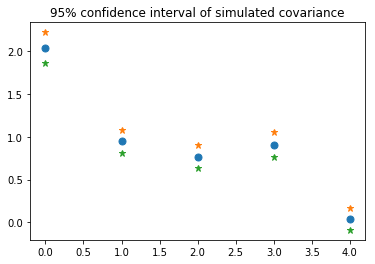

In [55]:
# For calling a defined function in Jupyter
MA_output = GaussianMAq(sigma = 1,I = 1000,theta = [1,0.5,0.3,0.8],H = 4)

acf_H     = MA_output[0]
MC_SD     = MA_output[1]

pd.DataFrame(acf_H,columns={"autocovariance function"})
